<a href="https://colab.research.google.com/github/Riwaj22/Machine-Learning-projects-/blob/main/Face_Swapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import dlib
import requests
from PIL import Image


In [3]:
!wget 'https://github.com/tzutalin/dlib-android/raw/master/data/shape_predictor_68_face_landmarks.dat'

--2024-11-14 14:44:04--  https://github.com/tzutalin/dlib-android/raw/master/data/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tzutalin/dlib-android/master/data/shape_predictor_68_face_landmarks.dat [following]
--2024-11-14 14:44:05--  https://raw.githubusercontent.com/tzutalin/dlib-android/master/data/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M   295MB/s    in 0.3s  

In [4]:
def extract_index_nparray(nparray):
  index = None
  for num in nparray[0]:
    index = num
    break
  return index

In [16]:
import requests
from PIL import Image
from io import BytesIO

# Fetch the image content from the direct image URL
response = requests.get('https://img.businessoffashion.com/resizer/v2/https%3A%2F%2Fprod-bof-media.s3.eu-west-1.amazonaws.com%2Fimport%2Fprofiles%2Fasset%2F1715%2Fa1f88b4a3c5c5b6761438553fe38ab872d9f59cc.jpeg?auth=7b03563a00ad77e3cd71c6cf0492ac463b993d18a585b2f94fc08539c3f031a2&height=350')

# Check if the response status is successful and the content type is an image
if response.status_code == 200 and 'image' in response.headers['Content-Type']:
    # Open the image using BytesIO
    image1 = Image.open(BytesIO(response.content))
    # Resize the image
    image1 = image1.resize((300, 300))
    image1.show()
else:
    print("The URL did not return an image.")


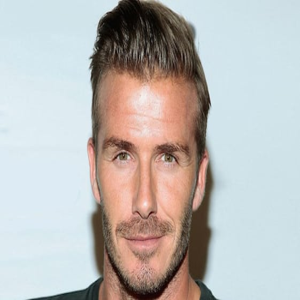

In [17]:
image1

In [18]:
# Fetch the image content from the direct image URL
response = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGv0ZIrLidHrXmxdSY38qwW3_FyQZhJo-sFQ&s')

# Check if the response status is successful and the content type is an image
if response.status_code == 200 and 'image' in response.headers['Content-Type']:
    # Open the image using BytesIO
    image2 = Image.open(BytesIO(response.content))
    # Resize the image
    image2 = image2.resize((300, 300))
    image2.show()
else:
    print("The URL did not return an image.")


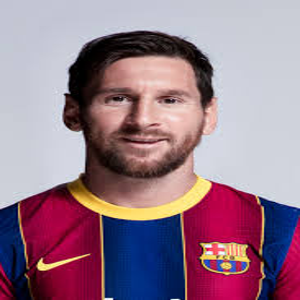

In [19]:
image2

In [20]:
img = np.array(image1)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(img_gray)

img2 = np.array(image2)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [21]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')
height, width, channels = img2.shape
img2_new_face = np.zeros((height, width, channels), np.uint8)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
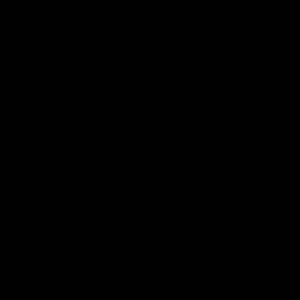

In [22]:
img2_new_face

In [24]:
# Face1
faces = detector(img_gray)
for face in faces:
  landmarks = predictor(img_gray, face)
  landmark_points = []
  for n in range(0, 68):

    x = landmarks.part(n).x
    y = landmarks.part(n).y
    landmark_points.append((x,y))

  points = np.array(landmark_points,np.int32)
  convexhull = cv2.convexHull(points)

  face_image_1 = cv2.bitwise_and(img, img, mask = mask)

  # Delaunay Triangualtion
  rect = cv2.boundingRect(convexhull)
  subdiv = cv2.Subdiv2D(rect)
  subdiv.insert(landmark_points)
  triangles = subdiv.getTriangleList()
  triangles = np.array(triangles, dtype = np.int32)

  indexes_triangles = []

  for t in triangles:
    pt1 = (t[0],t[1])
    pt2 = (t[2],t[3])
    pt3 = (t[4],t[5])


    index_pt1 = np.where((points == pt1).all(axis =1))
    index_pt1 = extract_index_nparray(index_pt1)

    index_pt2 = np.where((points == pt2).all(axis =1))
    index_pt2 = extract_index_nparray(index_pt2)

    index_pt3 = np.where((points == pt3).all(axis =1))
    index_pt3 = extract_index_nparray(index_pt3)

    if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
      triangle = [index_pt1, index_pt2, index_pt3]
      indexes_triangles.append(triangle)







In [27]:
# Face2

faces2 = detector(img2_gray)
for face in faces2:
    landmarks = predictor(img2_gray, face)
    landmarks_points2 = []

    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points2.append((x, y))

    points2 = np.array(landmarks_points2, np.int32)
    convexhull2 = cv2.convexHull(points2)


In [28]:
lines_space_mask = np.zeros_like(img_gray)
lines_space_new_face = np.zeros_like(img2)

In [30]:
# Triangulation of both faces

for triangle_index in indexes_triangles:

  tr1_pt1 = landmark_points[triangle_index[0]]
  tr1_pt2 = landmark_points[triangle_index[1]]
  tr1_pt3 = landmark_points[triangle_index[2]]

  triangle1 = np.array([tr1_pt1,tr1_pt2,tr1_pt3 ], np.int32)

  rect1 = cv2.boundingRect(triangle1)
  (x,y,w,h) = rect1
  cropped_triangle = img[y:y+h, x:x+w]
  cropped_tr1_mask = np.zeros((h,w), np.uint8)

  points = np.array(
      [
          [tr1_pt1[0]-x, tr1_pt1[1]-y],
           [tr1_pt2[0]-x, tr1_pt2[1]-y],
           [tr1_pt3[0]-x, tr1_pt3[1]-y],
      ], np.int32
  )

  cv2.fillConvexPoly(cropped_tr1_mask, points, 255)

  # Lines Space
  cv2.line(lines_space_mask, tr1_pt1,tr1_pt2, 255 )
  cv2.line(lines_space_mask, tr1_pt2,tr1_pt3, 255 )
  cv2.line(lines_space_mask, tr1_pt1,tr1_pt3, 255 )
  lines_space = cv2.bitwise_and(img, img, mask = lines_space_mask)

  tr2_pt1 = landmarks_points2[triangle_index[0]]
  tr2_pt2 = landmarks_points2[triangle_index[1]]
  tr2_pt3 = landmarks_points2[triangle_index[2]]
  triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)

  rect2 = cv2.boundingRect(triangle2)
  (x,y,w,h) = rect2

  cropped_tr2_mask = np.zeros((h,w), np.uint8)

  points2 = np.array(
      [
          [tr2_pt1[0]-x, tr2_pt1[1]-y],
           [tr2_pt2[0]-x, tr2_pt2[1]-y],
           [tr2_pt3[0]-x, tr2_pt3[1]-y],
      ], np.int32
  )

  # Warp Triangles
  points = np.float32(points)
  points2 = np.float32(points2)

  M = cv2.getAffineTransform(points, points2)
  warped_triangle = cv2.warpAffine(cropped_triangle, M, (w,h))
  warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle,mask = cropped_tr2_mask  )

  # Reconstructing destination face

  img2_new_face_rect_area = img2_new_face[y:y+h, x:x+w]
  img2_new_face_rect_area_gray = cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)
  _, mask_triangles_designed = cv2.threshold(img2_new_face_rect_area_gray,1,255,cv2.THRESH_BINARY_INV)
  warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask = mask_triangles_designed)

  img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
  img2_new_face[y:y+h, x:x+w] = img2_new_face_rect_area




In [31]:
# Face swapped

img2_face_mask = np.zeros_like(img2_gray)
img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
img2_face_mask = cv2.bitwise_not(img2_head_mask)

In [32]:
img2_head_noface = cv2.bitwise_and(img2, img2, mask = img2_face_mask)
result = cv2.add(img2_head_noface, img2_new_face)

In [33]:
(x,y,w,h) = cv2.boundingRect(convexhull2)
center_face2 = (int((x+x+w)/2), int((y+y+h)/2))
seamlessclone = cv2.seamlessClone(
    result, img2, img2_head_mask,
    center_face2, cv2.NORMAL_CLONE
)

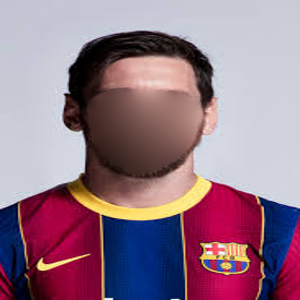

In [34]:
Image.fromarray(seamlessclone)

# GUI FOR FACE SWAPPING

In [40]:
from matplotlib import pyplot as plt

In [41]:
# Initialize dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')


In [45]:
# Helper function to extract triangle indexes
def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index



In [46]:
# Step 3: Define the Face Swapping Function
def swap_faces(img1, img2):
    img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    mask = np.zeros_like(img_gray)

    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    height, width, channels = img2.shape
    img2_new_face = np.zeros((height, width, channels), np.uint8)

    # Detect landmarks on the first face
    faces = detector(img_gray)
    indexes_triangles = []
    for face in faces:
        landmarks = predictor(img_gray, face)
        landmark_points = []
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            landmark_points.append((x, y))

        points = np.array(landmark_points, np.int32)
        convexhull = cv2.convexHull(points)

        # Delaunay triangulation
        rect = cv2.boundingRect(convexhull)
        subdiv = cv2.Subdiv2D(rect)
        subdiv.insert(landmark_points)
        triangles = subdiv.getTriangleList()
        triangles = np.array(triangles, dtype=np.int32)

        for t in triangles:
            pt1 = (t[0], t[1])
            pt2 = (t[2], t[3])
            pt3 = (t[4], t[5])

            index_pt1 = np.where((points == pt1).all(axis=1))
            index_pt1 = extract_index_nparray(index_pt1)

            index_pt2 = np.where((points == pt2).all(axis=1))
            index_pt2 = extract_index_nparray(index_pt2)

            index_pt3 = np.where((points == pt3).all(axis=1))
            index_pt3 = extract_index_nparray(index_pt3)

            if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
                triangle = [index_pt1, index_pt2, index_pt3]
                indexes_triangles.append(triangle)

    # Detect landmarks on the second face
    faces2 = detector(img2_gray)
    for face in faces2:
        landmarks = predictor(img2_gray, face)
        landmarks_points2 = []
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            landmarks_points2.append((x, y))

        points2 = np.array(landmarks_points2, np.int32)
        convexhull2 = cv2.convexHull(points2)

    # Triangulation of both faces
    for triangle_index in indexes_triangles:
        tr1_pt1 = landmark_points[triangle_index[0]]
        tr1_pt2 = landmark_points[triangle_index[1]]
        tr1_pt3 = landmark_points[triangle_index[2]]
        triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)

        rect1 = cv2.boundingRect(triangle1)
        (x, y, w, h) = rect1
        cropped_triangle = img1[y:y + h, x:x + w]
        cropped_tr1_mask = np.zeros((h, w), np.uint8)

        points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                           [tr1_pt2[0] - x, tr1_pt2[1] - y],
                           [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)

        cv2.fillConvexPoly(cropped_tr1_mask, points, 255)

        tr2_pt1 = landmarks_points2[triangle_index[0]]
        tr2_pt2 = landmarks_points2[triangle_index[1]]
        tr2_pt3 = landmarks_points2[triangle_index[2]]
        triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)

        rect2 = cv2.boundingRect(triangle2)
        (x, y, w, h) = rect2

        cropped_tr2_mask = np.zeros((h, w), np.uint8)

        points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                            [tr2_pt2[0] - x, tr2_pt2[1] - y],
                            [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)

        # Warp triangles
        points = np.float32(points)
        points2 = np.float32(points2)
        M = cv2.getAffineTransform(points, points2)
        warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
        warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)

        img2_new_face[y:y + h, x:x + w] = img2_new_face[y:y + h, x:x + w] + warped_triangle

    img2_face_mask = np.zeros_like(img2_gray)
    img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
    img2_face_mask = cv2.bitwise_not(img2_head_mask)
    img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
    result = cv2.add(img2_head_noface, img2_new_face)

    (x, y, w, h) = cv2.boundingRect(convexhull2)
    center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))
    seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.NORMAL_CLONE)

    return seamlessclone


Saving salman.jpg to salman (4).jpg


Saving srk.jpg to srk (2).jpg


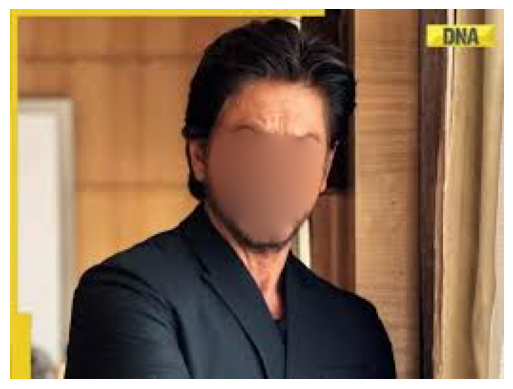

In [50]:
from google.colab import files

# Upload images
uploaded = files.upload()
img1_path = list(uploaded.keys())[0]
uploaded = files.upload()
img2_path = list(uploaded.keys())[0]

# Load images and swap faces
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
result_img = swap_faces(img1, img2)

# Display the result
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()